# **1. PCA(Principal Component Analysis)**

사이킷런에서 제공하는 `와인` 데이터세트로 PCA 실습을 진행합니다.

**데이터 준비**

- 아래 코드를 실행해주세요

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# 와인 데이터세트 불러오기 (DataFrame으로 직접 로드)
wine_data = load_wine(as_frame=True)

# DataFrame에 접근
wine_df = wine_data.frame

# 첫 5행 출력
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## **1-1. 스케일링이 적용된 데이터 세트에 PCA를 적용해 와인 데이터를 2차원 PCA 데이터로 변환 해주세요.**

**스케일링 적용**

- 아래 코드를 실행해주세요

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포로 변환
wine_scaled = StandardScaler().fit_transform(wine_df.iloc[:, :-1])

**문제**

- 아래 코드를 완성해주세요

In [ ]:
# PCA 클래스 임포트
from sklearn.decomposition import PCA

# 2차원으로 변환
pca = PCA(n_components=2)   # 힌트: n_components

# fit( )과 transform( )을 호출하여 PCA 변환 데이터 반환
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)

print(wine_pca.shape)

(178, 2)


## **1-2. 2개의 속성으로 PCA 변환된 데이터 세트를 pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 해서 2차원상에서 시각화 해주세요.**

- 아래 코드를 완성해주세요.

In [ ]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 지정
pca_columns=['pca_component_1','pca_component_2']
wineDF_pca = pd.DataFrame(wine_pca, columns = ['pca_component_1', 'pca_component_2'])
wineDF_pca['target'] = wine_data.target

wineDF_pca.head()

,pca_component_1,pca_component_2,target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0
3,3.757066,2.756372,0
4,1.008908,0.869831,0


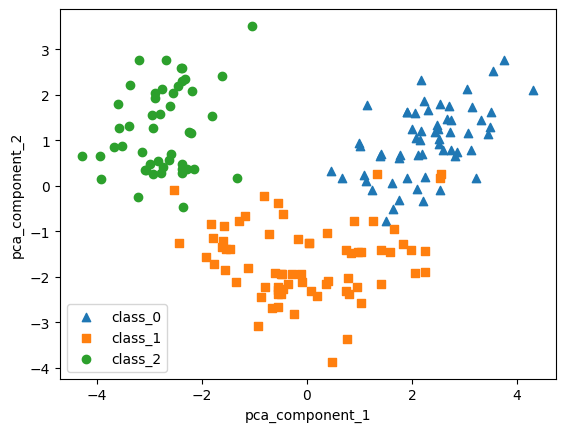

In [ ]:
# 0을 세모, 1을 네모, 2를 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pca_component_2 를 y축으로 scatter plot 시각화
for i, marker in enumerate(markers):
    x_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_1']
    y_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine_data.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

## **1-3. PCA 객체의 속성을 사용하여 PCA component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 확인 해주세요.**

- 아래 코드를 완성해주세요

In [ ]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


# **2. 차원을 선택하는 방법**

## **Scree Plot을 통해 적절한 차원 수를 선택하고 이유를 설명하세요.**


### **Scree Plot에 대한 설명**
- PCA 분석 후 주성분의 수를 결정하기 위해 활용하는 plot
- x축에 주성분, y축에 해당 주성분에 대응하는 고유값을 연결하며, 보통 그래프가 완만해지는 부분까지의 주성분을 활용
  - 주성분의 설명된 분산(explained variance)의 누적 비율이 안정화 되는 지점을 선택

- 아래 코드를 실행해주세요.

In [ ]:
### Scree Plot 시각화
import numpy as np

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components) + 1
    vals = pca.explained_variance_ratio_

    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db', '#9b59b6'])  # Bar plot
    ax.plot(ind, cumvals, color='#c0392b')

    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]),
        					  va="bottom", ha="center", fontsize=13)

    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')

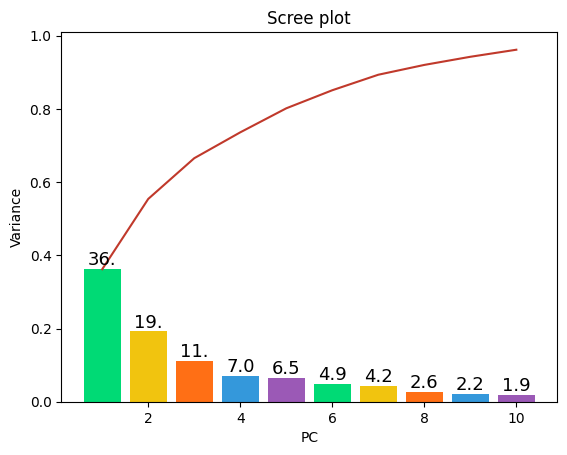

In [ ]:
import numpy as np

# PCA를 수행하여 각 주성분의 설명된 분산의 비율을 계산
pca2 = PCA(n_components = 10)
pca2.fit(wine_scaled)

# Scree Plot을 그려서 각 주성분의 설명된 분산의 비율을 시각화합니다.
scree_plot(pca2)

4 / 3번째 주성분 이후로 variance 비율이 10 미만으로 매우 적고 4번째 주성분 부터 곡선이 비교적 완만해지는 모습을 보이고 있습니다.


# **3. LDA**
- 사이킷런에서 제공하는 `유방암(breast cancer)` 데이터 세트로 LDA 실습을 진행합니다.

**데이터 준비**  
- 아래 코드를 실행해 주세요.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Iris 데이터셋 로드 및 스케일링
iris = load_iris()
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

## **3-1. 스케일링이 적용된 데이터 세트에 LDA를 적용해 아이리스 데이터를 1차원 LDA 데이터로 변환 해주세요.**

- 아래 코드를 완성해주세요.

In [ ]:
# LDA 객체 생성 및 데이터 변환
# 1차원으로 변환
lda = LinearDiscriminantAnalysis(n_components=1)  # 힌트: n_components 사용

# fit( )과 transform( )을 호출하여 PCA 변환 데이터 반환
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

print(iris_lda.shape)

(150, 1)


## **3-2. 1개의 속성으로 LDA 변환된 데이터 세트의 칼럼명을  lda_component_1으로 지정해서 2차원상에서 시각화 해주세요.**

**변환된 데이터를 DataFram으로 저장**
- 아래 코드를 완성해주세요.

In [ ]:
# LDA 변환된 데이터의 컬럼명을 lda_component_1로 지정
lda_df = pd.DataFrame(iris_lda, columns=['lda_component_1'])
lda_df['target'] = iris.target

lda_df.head()

,lda_component_1,target
0,8.061800,0
1,7.128688,0
2,7.489828,0
3,6.813201,0
4,8.132309,0


**LDA 변환된 값을 히스토그램으로 시각화**

- 아래 코드를 완성해주세요.

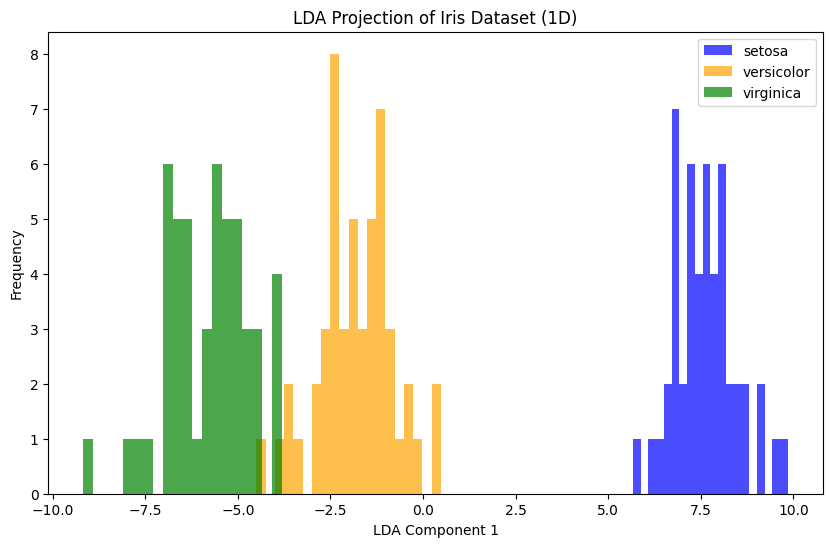

In [ ]:
# 클래스별로 분포를 시각화 (히스토그램)
markers = ['setosa', 'versicolor', 'virginica']
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(10, 6))
for i, color in enumerate(colors):
    plt.hist(
        lda_df[lda_df['target'] == i]['lda_component_1'],
        bins=20,
        alpha=0.7,
        label=markers[i],
        color=color,
    )

plt.title("LDA Projection of Iris Dataset (1D)")
plt.xlabel("LDA Component 1")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

# **4. SVD(Singular Value Decomposition)**

# **4-1. PCA와 SVD의 차이를 서술해주세요.**


**답안 작성**

PCA는 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용이 가능합니다.

# **4-2. make_classification 데이터를 TruncatedSVD를 이용해 변환해주세요.**

make_classification() 함수로 데이터를 만들고 실습을 진행합니다.

- 아래 코드를 완성해주세요.

Text(0, 0.5, 'TruncatedSVD Component2')

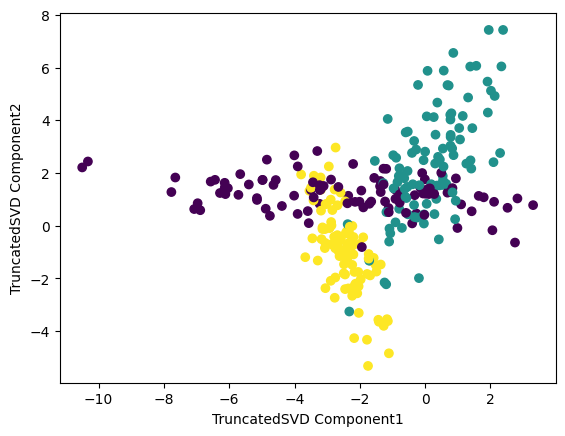

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

#make_classification() 함수 이용
X,y=make_classification(n_samples=300, n_features=5, n_informative=3, n_redundant=2,
                        n_classes=3, n_clusters_per_class=1, random_state=42)

#2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(X)
X_tsvd=tsvd.transform(X)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현
plt.scatter(x=X_tsvd[:,0],y=X_tsvd[:,1],c=y)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')

# **4-3. TruncatedSVD와 PCA 클래스를 비교해주세요**

1) 아래 코드를 완성해주세요.

Text(0.5, 1.0, 'PCA Transformed')

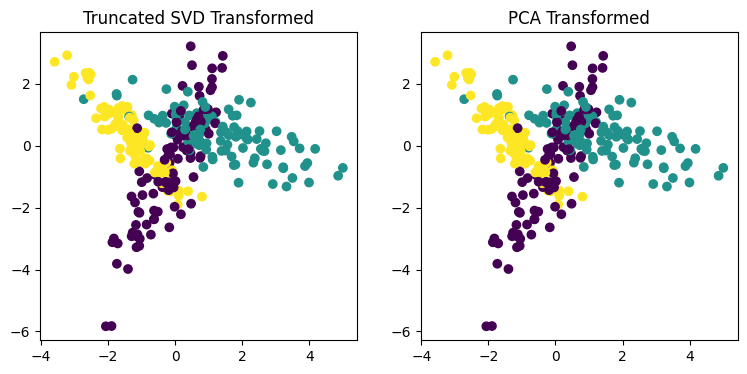

In [ ]:
from sklearn.preprocessing import StandardScaler

#데이터를 StandardScaler로 변환
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(X_scaled)
X_tsvd=tsvd.transform(X_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

#TruncatedSVD 변환 데이터, PCA 변환 데이터를 표현
fig,(ax1,ax2)=plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=X_tsvd[:,0],y=X_tsvd[:,1],c=y)
ax2.scatter(x=X_pca[:,0],y=X_pca[:,1],c=y)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

2) 다음 코드를 실행한 후 결과를 분석해주세요.

In [ ]:
print((X_pca-X_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

4.0861194636199196e-16
-6.938893903907228e-18


**답안 작성**

모두 0에 가까운 값으로 2개의 변환이 서로 동일함을 알 수 있습니다.

# **5. NMF(Non-Negative Matrix Factorization)**

# **5-1. 데이터를 2개의 컴포넌트로 변환한 후 시각화 해주세요.**

- 아래 코드를 완성해주세요.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

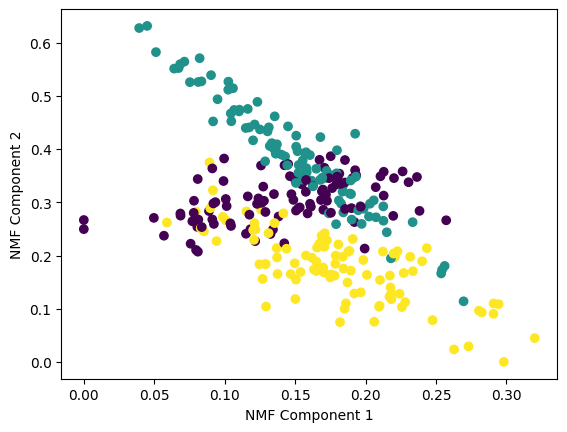

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

nmf = NMF(n_components=2)
X_nmf = nmf.fit_transform(X_scaled)

plt.scatter(x=X_nmf[:,0],y=X_nmf[:,1],c=y)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

# **6. t-SNE**

* 필요한 라이브러리와 데이터를 불러오는 과정입니다.(코드를 실행해주세요)

In [ ]:
%matplotlib inline

# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer #Loading the full DataSet From Sklearn Library

# 유방암 데이터 불러오기
cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

### **6-1. 데이터를 표준화하는 과정입니다. 빈칸에 알맞게 써주세요.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준화
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

###**6-2. t-SNE 기법을 활용하여 2차원으로 축소하는 과정입니다. 빈칸에 알맞게 써주세요.**

In [ ]:
from sklearn.manifold import TSNE

# 차원 축소
tsne = TSNE(random_state = 42)
canc_tsne = tsne.fit_transform(canc_norm)

# 차원 축소 전, 후 비교
print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


### **6-3. 다음은 차원 축소 결과를 시각화하는 과정입니다. 빈칸에 알맞게 써주세요.**

* 시각화 함수를 정의하는 코드입니다. (코드를 실행해주세요)

In [ ]:
# labelled Scatter Plot 함수
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)

    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)

    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

* ```plot_labelled_scatter```에 t-SNE를 적용한 데이터를 입력합니다.

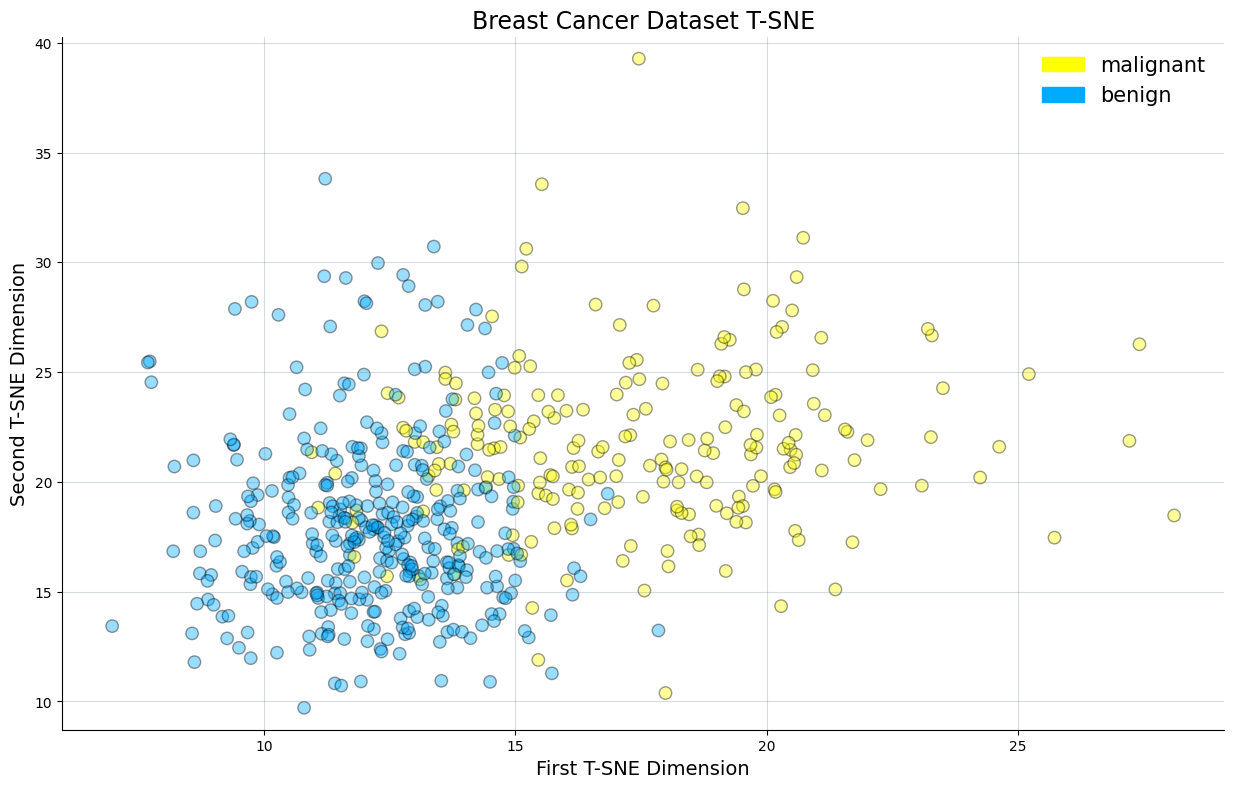

In [ ]:
# 시각화
plot_labelled_scatter(X_canc, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);

# **7. MDS**

* 6번과 동일한 데이터를 활용합니다

### **7-1. MDS를 활용하여 2차원으로 축소해주세요.**  
* n_components는 차원축소 후 feature 개수를 지정하는 변수입니다.

In [ ]:
from sklearn.manifold import MDS

# 차원축소
mds = MDS(n_components = 2,random_state = 2)
canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


### **7-2. 차원축소한 결과를 시각화하는 과정입니다. 빈칸을 알맞게 채워주세요.**

* ```plot_labelled_scatter```에 MDS를 적용한 데이터를 입력합니다.

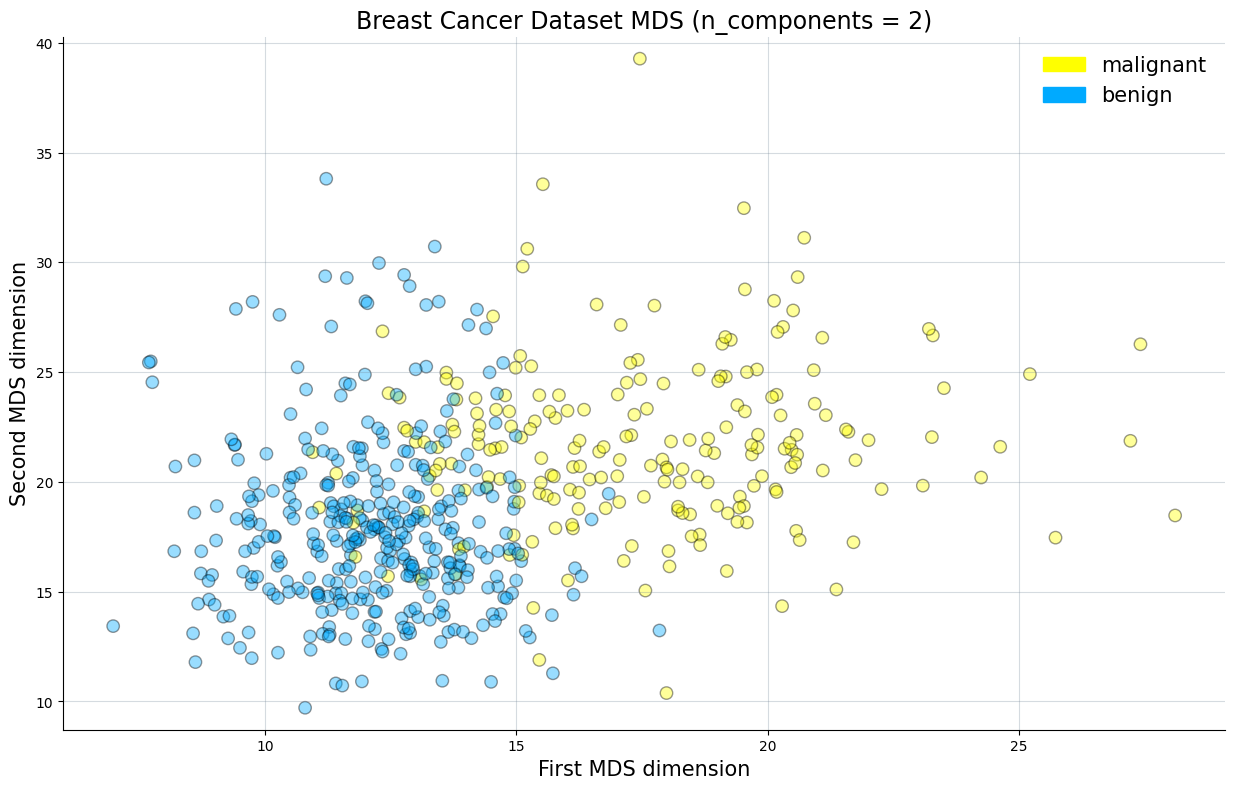

In [ ]:
# 시각화
plot_labelled_scatter(X_canc, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17);